<a href="https://colab.research.google.com/github/B10956048/113_Finance/blob/main/0917_%E5%9C%A8%E8%81%B7%E5%B0%88%E7%8F%AD_week2_%E6%99%82%E9%96%93%E5%BA%8F%E5%88%97LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>取得股價資料</b>

In [ ]:
import yfinance as yf  # yahoo finance 套件
import pandas as pd  # 結構化資料處理套件
import datetime as dt  # 時間套件
import numpy as np

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2025-09-18 02:43:28--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.204.138, 172.217.204.139, 172.217.204.101, ...
Connecting to drive.google.com (drive.google.com)|172.217.204.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-09-18 02:43:29--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.216.132, 2607:f8b0:400c:c12::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.216.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  64.5MB/s    in 0.3s    

2025-09-18 

In [ ]:
# 輸入股票代號
stock_id = '2330.tw'
# stock_id = '2357.tw'
# stock_id = '2317.tw'
# stock_id = 'AAPL'
# stock_id = 'NVDA'

'''今天往前算幾天'''
# 資料結束時間
end = dt.date.today()
# 抓取半年資料（現在-過去180天）
# start = end - dt.timedelta(days=180)

'''抓取特定時間'''
start = dt.datetime(2020, 1, 1)  # 指定的開始日期
end = dt.datetime(2024, 10, 10)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
stock_data = yf.download(stock_id, start=start, end=end).reset_index()

# 將日期欄位轉為datetime格式
stock_data["Date"] = pd.to_datetime(stock_data["Date"])
# 將日期欄位設為索引
stock_data.set_index("Date", inplace=True)
print(stock_data.head())

/tmp/ipython-input-1965857643.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(stock_id, start=start, end=end).reset_index()
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker         2330.TW     2330.TW     2330.TW     2330.TW   2330.TW
Date                                                                
2020-01-02  301.351898  301.351898  295.573764  295.573764  31754120
2020-01-03  301.796448  306.685639  298.240672  305.796695  41811268
2020-01-06  295.129364  297.351724  295.129364  296.018308  45343057
2020-01-07  292.906952  296.018255  290.240121  295.573783  50879181
2020-01-08  292.906952  296.018255  288.906705  288.906705  37567748


In [ ]:
# 取得收盤價
close_prices = stock_data[['Close']]

In [ ]:
def calculate_technical_indicators(data):
    """計算更有意義的技術指標"""
    df = data.copy()

    # 1. 價格相對位置指標（避免直接使用移動平均）
    df['Price_above_MA20'] = (df['Close'] - df['Close'].rolling(20).mean()) / df['Close'].rolling(20).mean()

    # 2. 價格動量指標
    df['Price_momentum_5'] = df['Close'].pct_change(5)  # 5日報酬率
    df['Price_momentum_10'] = df['Close'].pct_change(10)  # 10日報酬率

    # 3. 波動率指標
    df['Volatility_10'] = df['Close'].pct_change().rolling(10).std() * np.sqrt(252)  # 年化波動率

    # 4. RSI (保留，因為是不同類型的指標)
    def calculate_rsi(prices, window=14):
        delta = prices.diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))
        return rsi

    df['RSI'] = calculate_rsi(df['Close'])

    # 5. 成交量動能
    df['Volume_ratio'] = df['Volume'] / df['Volume'].rolling(20).mean()

    return df

In [ ]:
# 計算技術指標
stock_data_with_indicators = calculate_technical_indicators(stock_data)
print(stock_data_with_indicators.head(10))

Price            Close        High         Low        Open    Volume  \
Ticker         2330.TW     2330.TW     2330.TW     2330.TW   2330.TW   
Date                                                                   
2020-01-02  301.351898  301.351898  295.573764  295.573764  31754120   
2020-01-03  301.796448  306.685639  298.240672  305.796695  41811268   
2020-01-06  295.129364  297.351724  295.129364  296.018308  45343057   
2020-01-07  292.906952  296.018255  290.240121  295.573783  50879181   
2020-01-08  292.906952  296.018255  288.906705  288.906705  37567748   
2020-01-09  300.018524  300.018524  296.462749  297.796165  31481504   
2020-01-10  301.796448  303.129864  298.685144  302.685392  27032115   
2020-01-13  303.574280  304.018752  301.351920  304.018752  30663332   
2020-01-14  307.574615  307.574615  306.241200  307.130143  30223993   
2020-01-15  302.240875  306.685594  300.018516  306.685594  47434274   

Price      Price_above_MA20 Price_momentum_5 Price_momentum_10 

# <b>1. 長短期記憶 (Long Short-Term Memory, LSTM)</b>

## <b>1.1 單步預測</b>
輸入連續 N 天的收盤價，只預測第 N+1 天的收盤價。

### <b>1.1.1 資料前處理</b>


In [ ]:
# 資料集拆分
# 訓練資料集佔80%, 測試資料集佔20%
train_size = int(len(close_prices) * 0.8)
train_data = close_prices[:train_size]
test_data = close_prices[train_size:]

In [ ]:
# 顯示訓練資料集和測試資料集的大小 (資料筆數, 特徵數)
print('訓練集形狀：', train_data.shape)
print('測試集形狀：', test_data.shape)

訓練集形狀： (926, 1)
測試集形狀： (232, 1)


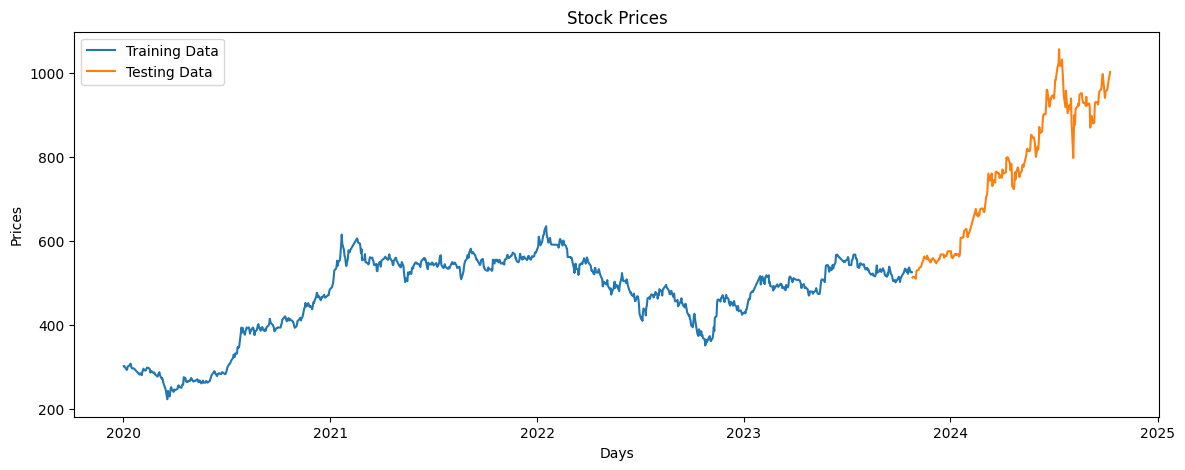

In [ ]:
import matplotlib.pyplot as plt  # 畫圖套件

# 顯示訓練集和測試集的收盤價曲線
plt.figure(figsize=(14, 5))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Testing Data')
plt.title('Stock Prices')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler  # 正規化套件

# 正規化數據（僅對訓練集進行 fit）
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

In [ ]:
import numpy as np  # 數學運算套件

# 設置輸入窗口
window_size = 10

# 構建訓練和測試數據集
def create_dataset(dataset, window_size):
    X, y = [], []
    # 滑動窗口
    for i in range(len(dataset) - window_size):
        X.append(dataset[i:i + window_size, 0])
        y.append(dataset[i + window_size, 0])
    return np.array(X), np.array(y)


# 訓練集和測試集
X_train, y_train = create_dataset(train_data_scaled, window_size)
X_test, y_test = create_dataset(test_data_scaled, window_size)

# 為了符合 LSTM 的輸入，重塑輸入為 (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# 輸出訓練和測試數據集的形狀
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(916, 10, 1) (916,) (222, 10, 1) (222,)


### <b>1.1.2 建立 LSTM 模型</b>


In [ ]:
from tensorflow.keras.models import Sequential  # 模型容器
from tensorflow.keras.layers import (
    Input,  # 輸入層
    LSTM,  # LSTM 層
    Dense,  # 全連接層
    Dropout  # Dropout 層
)

lstm_model = Sequential(name='one-step_prediction_lstm_model')  # 創建模型

lstm_model.add(Input(shape=(window_size, 1), name='Input'))  # 輸入層 (窗口大小，特徵數)

lstm_model.add(LSTM(64, name='LSTM'))  # LSTM 層 (64 個神經元)

lstm_model.add(Dense(64, name='Dense_1'))  # 全連接層 (64 個神經元)
lstm_model.add(Dropout(0.2, name='Dropout_1'))  # Dropout 層 (0.2) 隨機關閉 20% 神經元

lstm_model.add(Dense(32, name='Dense_2'))  # 全連接層 (32 個神經元)
lstm_model.add(Dropout(0.2, name='Dropout_2'))  # Dropout 層 (0.2) 隨機關閉 20% 神經元

lstm_model.add(Dense(1, name='Output'))  # 輸出層 (1 個神經元)

lstm_model.compile(optimizer='adam', loss='mse')  # 編譯模型
lstm_model.summary()  # 顯示模型結構

Model: "one-step_prediction_lstm_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,169 (90.50 KB)

 Trainable params: 23,169 (90.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 訓練模型
hist_v1 = lstm_model.fit(
    X_train,  # 特徵
    y_train,  # 標籤
    epochs=100,  # 訓練次數
    batch_size=32,  # 批次大小
    validation_split=0.2,  # 驗證集比例
    verbose=1  # 顯示訓練過程 (0: 不顯示, 1: 顯示進度條, 2: 顯示每個 epoch)
)

Epoch 1/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.1277 - val_loss: 0.0170
Epoch 2/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0154 - val_loss: 0.0033
Epoch 3/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0106 - val_loss: 0.0015
Epoch 4/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0088 - val_loss: 0.0014
Epoch 5/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0099 - val_loss: 0.0016
Epoch 6/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0091 - val_loss: 0.0015
Epoch 7/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0067 - val_loss: 9.7102e-04
Epoch 8/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0071 - val_loss: 0.0012
Epoch 9/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0067 - val_loss: 7.2136e-04
Epoch 10/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0068 - val_loss: 7.5218e-04
Epoch 11/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0071 - val_loss: 0.0020
Epoch 12/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0

### <b>1.1.3 結果評估</b>


In [ ]:
# 評估測試集
mse = lstm_model.evaluate(X_test, y_test)
print('Mean Squared Error:', mse)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030     
Mean Squared Error: 0.005517055746167898


In [ ]:
# 預測股價
y_pred = lstm_model.predict(X_test)
# 反正規化預測值 (0~1 -> 實際值)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
# 預測值轉為 DataFrame 格式
test_predict = pd.DataFrame(
    y_pred, columns=['Predicted'], index=test_data[window_size:].index)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


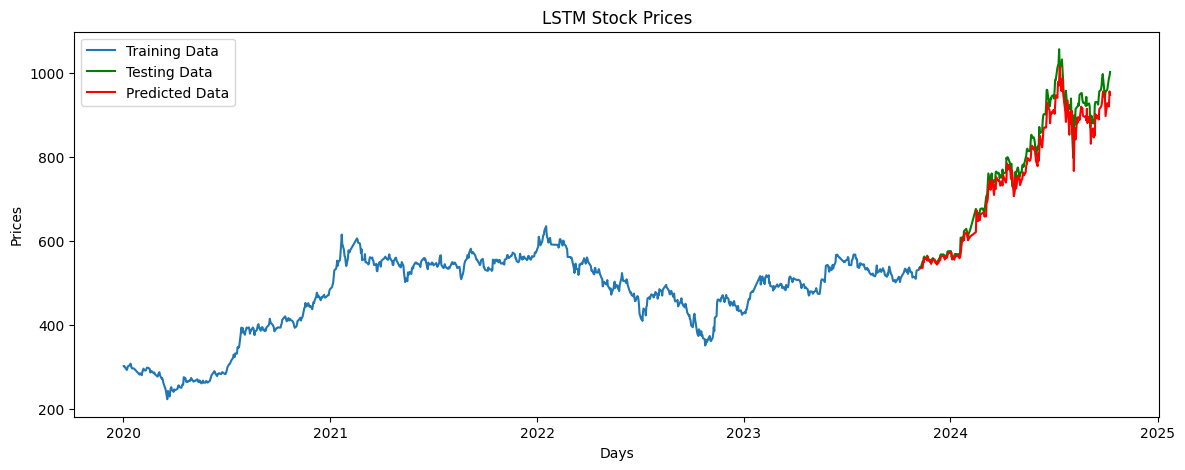

In [ ]:
# 繪製整個資料集
plt.figure(figsize=(14, 5))
plt.plot(close_prices[:train_size + window_size],
         label='Training Data')  # 訓練集部分
plt.plot(close_prices[train_size + window_size:],
         label='Testing Data', color='green')  # 測試集部分
plt.plot(test_predict, label='Predicted Data', color='red')  # 預測部分
plt.title('LSTM Stock Prices')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.legend()
plt.show()

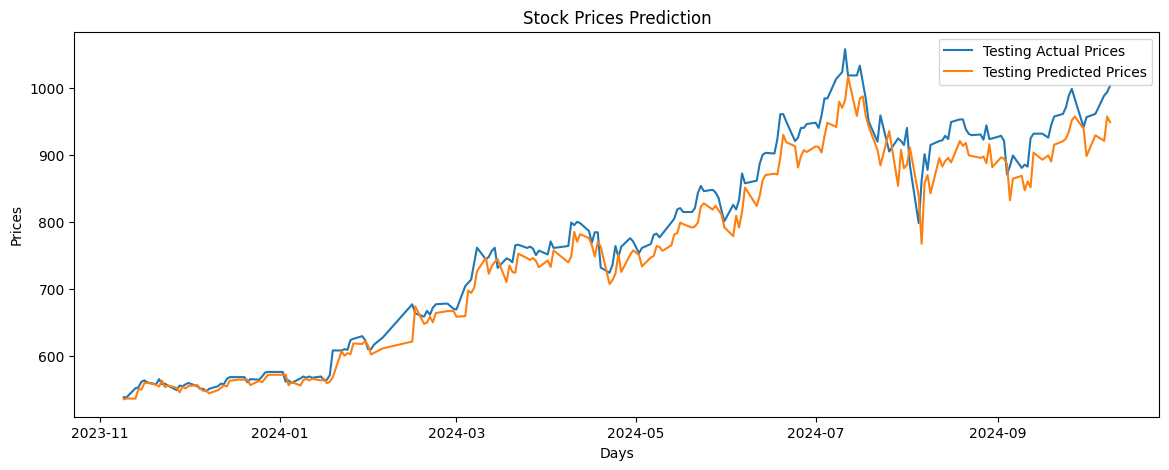

In [ ]:
# 繪製測試集部分
plt.figure(figsize=(14, 5))
plt.plot(close_prices[train_size + window_size:],
         label='Testing Actual Prices')
plt.plot(test_predict, label='Testing Predicted Prices')
plt.title('Stock Prices Prediction')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.legend()
plt.show()

###1.1.4 加入技術指標(特徵工程)

In [ ]:
#輸入連續 N 天的收盤價+技術指標，預測第 N+1 天的收盤價。
# 選擇要使用的特徵欄位
#feature_columns = [
#    'Close',           # 收盤價
#    'MA5', 'MA10',     # 移動平均線
#    'RSI',             # RSI指標
#    'MACD',            # MACD指標
#]

# 選擇改進後的特徵
feature_columns = [
    'Close',
    'Price_above_MA20',    # 相對位置而非絕對價格
    'Price_momentum_5',    # 短期動量
    'Price_momentum_10',   # 中期動量
    'Volatility_10',       # 波動率
    'RSI',                 # 超買超賣
    'Volume_ratio'         # 成交量動能
]


# 只取需要的欄位，並移除缺失值
features_data = stock_data_with_indicators[feature_columns].dropna()

print('技術指標資料形狀：', features_data.shape)
print('使用的特徵：', feature_columns)

# 重新分割資料 (因為有些資料因為技術指標計算被移除了)
train_size_v2 = int(len(features_data) * 0.8)
train_data_v2 = features_data[:train_size_v2]
test_data_v2 = features_data[train_size_v2:]

print('版本B訓練集形狀：', train_data_v2.shape)
print('版本B測試集形狀：', test_data_v2.shape)

技術指標資料形狀： (1139, 7)
使用的特徵： ['Close', 'Price_above_MA20', 'Price_momentum_5', 'Price_momentum_10', 'Volatility_10', 'RSI', 'Volume_ratio']
版本B訓練集形狀： (911, 7)
版本B測試集形狀： (228, 7)


In [ ]:
# 正規化數據
scaler_v2 = MinMaxScaler(feature_range=(0, 1))
train_data_v2_scaled = scaler_v2.fit_transform(train_data_v2)
test_data_v2_scaled = scaler_v2.transform(test_data_v2)

In [ ]:
# 構建多特徵訓練和測試數據集
def create_dataset_multifeature(dataset, window_size, target_col_idx=0):
    """
    建立多特徵資料集
    dataset: 正規化後的資料
    window_size: 時間窗口大小
    target_col_idx: 目標欄位的索引 (Close價格在第0欄)
    """
    X, y = [], []
    # 滑動窗口
    for i in range(len(dataset) - window_size):
        # X包含所有特徵的時間序列
        X.append(dataset[i:i + window_size, :])  # 所有特徵
        # y只預測Close價格
        y.append(dataset[i + window_size, target_col_idx])  # Close價格
    return np.array(X), np.array(y)

# 訓練集和測試集 (Close價格在第0個位置)
X_train_v2, y_train_v2 = create_dataset_multifeature(train_data_v2_scaled, window_size, target_col_idx=0)
X_test_v2, y_test_v2 = create_dataset_multifeature(test_data_v2_scaled, window_size, target_col_idx=0)

print('版本B - X_train形狀 (樣本數, 時間步, 特徵數):', X_train_v2.shape)
print('版本B - y_train形狀:', y_train_v2.shape)
print('版本B - X_test形狀:', X_test_v2.shape)
print('版本B - y_test形狀:', y_test_v2.shape)


版本B - X_train形狀 (樣本數, 時間步, 特徵數): (901, 10, 7)
版本B - y_train形狀: (901,)
版本B - X_test形狀: (218, 10, 7)
版本B - y_test形狀: (218,)


In [ ]:
"""### <b>1.2.2 建立 LSTM 模型 - 版本B</b>"""

# 取得特徵數量
n_features = X_train_v2.shape[2]
print(f'版本B特徵數量: {n_features}')

lstm_model_v2 = Sequential(name='one-step_prediction_lstm_model_v2')  # 創建模型

lstm_model_v2.add(Input(shape=(window_size, n_features), name='Input'))  # 輸入層 (窗口大小，特徵數)

lstm_model_v2.add(LSTM(64, name='LSTM'))  # LSTM 層 (64 個神經元)

lstm_model_v2.add(Dense(64, name='Dense_1'))  # 全連接層 (64 個神經元)
lstm_model_v2.add(Dropout(0.2, name='Dropout_1'))  # Dropout 層 (0.2) 隨機關閉 20% 神經元

lstm_model_v2.add(Dense(32, name='Dense_2'))  # 全連接層 (32 個神經元)
lstm_model_v2.add(Dropout(0.2, name='Dropout_2'))  # Dropout 層 (0.2) 隨機關閉 20% 神經元

lstm_model_v2.add(Dense(1, name='Output'))  # 輸出層 (1 個神經元)

lstm_model_v2.compile(optimizer='adam', loss='mse')  # 編譯模型
lstm_model_v2.summary()  # 顯示模型結構

# 訓練模型
hist_v2 = lstm_model_v2.fit(
    X_train_v2,  # 特徵
    y_train_v2,  # 標籤
    epochs=100,  # 訓練次數
    batch_size=32,  # 批次大小
    validation_split=0.2,  # 驗證集比例
    verbose=1  # 顯示訓練過程
)

版本B特徵數量: 7


Model: "one-step_prediction_lstm_model_v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM (LSTM)                     │ (None, 64)             │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,705 (96.50 KB)

 Trainable params: 24,705 (96.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.1925 - val_loss: 0.0356
Epoch 2/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0234 - val_loss: 0.0043
Epoch 3/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0116 - val_loss: 0.0011
Epoch 4/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0104 - val_loss: 7.3952e-04
Epoch 5/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0096 - val_loss: 0.0019
Epoch 6/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0084 - val_loss: 0.0011
Epoch 7/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0077 - val_loss: 6.8280e-04
Epoch 8/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0079 - val_loss: 0.0013
Epoch 9/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0068 - val_loss: 4.4466e-04
Epoch 10/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0071 - val_loss: 4.2988e-04
Epoch 11/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0078 - val_loss: 5.5475e-04
Epoch 12/500
23/23 ━━━━━━━━━━━━━

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0024     
版本B Mean Squared Error: 0.004363947082310915
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


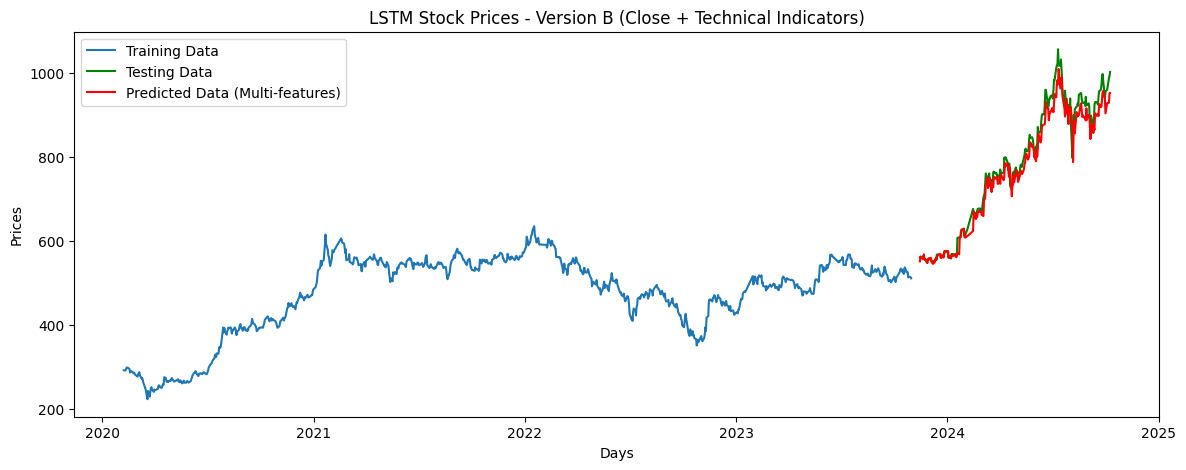

In [ ]:
"""### <b>1.2.3 結果評估 - 版本B</b>"""

# 評估測試集
mse_v2 = lstm_model_v2.evaluate(X_test_v2, y_test_v2)
print('版本B Mean Squared Error:', mse_v2)

# 預測股價
y_pred_v2 = lstm_model_v2.predict(X_test_v2)

# 反正規化預測值 - 版本B
def inverse_transform_target(scaler, y_scaled, n_features, target_col_idx=0):
    """反正規化目標變數"""
    # 創建和原始特徵數相同的陣列
    dummy = np.zeros((len(y_scaled), n_features))
    dummy[:, target_col_idx] = y_scaled.flatten()
    # 反正規化
    dummy_inv = scaler.inverse_transform(dummy)
    return dummy_inv[:, target_col_idx]

y_pred_v2_actual = inverse_transform_target(scaler_v2, y_pred_v2, n_features)
y_test_v2_actual = inverse_transform_target(scaler_v2, y_test_v2, n_features)

# 預測值轉為 DataFrame 格式
test_dates_v2 = test_data_v2.index[window_size:]
test_predict_v2 = pd.DataFrame(
    y_pred_v2_actual, columns=['Predicted'], index=test_dates_v2)

# 繪製版本B結果
plt.figure(figsize=(14, 5))
plt.plot(features_data[:train_size_v2]['Close'], label='Training Data')
plt.plot(test_data_v2['Close'][window_size:], label='Testing Data', color='green')
plt.plot(test_predict_v2, label='Predicted Data (Multi-features)', color='red')
plt.title('LSTM Stock Prices - Version B (Close + Technical Indicators)')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.legend()
plt.show()

=== 單步預測模型比較 ===
版本A (只使用Close):
  MSE: 939.7855
  MAE: 23.8535
版本B (Close + 技術指標):
  MSE: 743.3626
  MAE: 20.4659

版本B比版本A MSE改善了 20.90%


/tmp/ipython-input-2875132336.py:54: UserWarning: Glyph 35347 (\N{CJK UNIFIED IDEOGRAPH-8A13}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2875132336.py:54: UserWarning: Glyph 32244 (\N{CJK UNIFIED IDEOGRAPH-7DF4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2875132336.py:54: UserWarning: Glyph 36942 (\N{CJK UNIFIED IDEOGRAPH-904E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2875132336.py:54: UserWarning: Glyph 31243 (\N{CJK UNIFIED IDEOGRAPH-7A0B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2875132336.py:54: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2875132336.py:54: UserWarning: Glyph 36611 (\N{CJK UNIFIED IDEOGRAPH-8F03}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2875132336.py:54: UserWarning: Glyph 29256 (\N{CJK UNIFIED IDEOGRAPH-7248}) missi

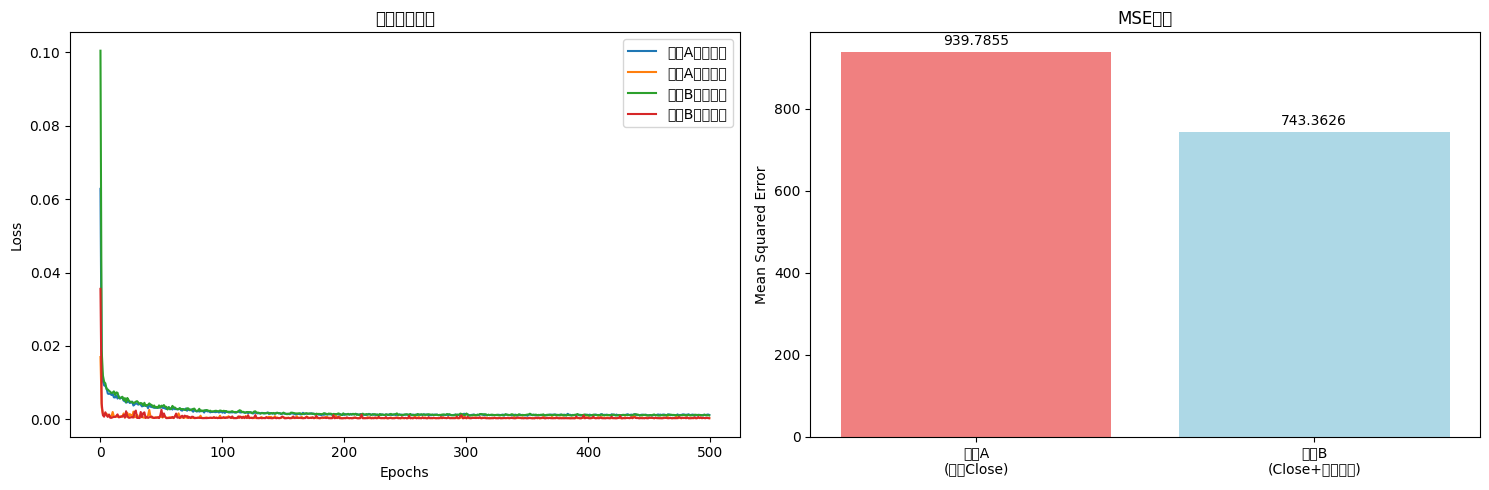

In [ ]:
"""### <b>1.2.4 版本A vs 版本B 比較</b>"""

from sklearn.metrics import mean_squared_error, mean_absolute_error

# 計算版本A評估指標 (重新計算，確保一致)
y_test_v1_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
mse_v1_actual = mean_squared_error(y_test_v1_actual, y_pred.flatten())
mae_v1 = mean_absolute_error(y_test_v1_actual, y_pred.flatten())

# 計算版本B評估指標
mse_v2_actual = mean_squared_error(y_test_v2_actual, y_pred_v2_actual)
mae_v2 = mean_absolute_error(y_test_v2_actual, y_pred_v2_actual)

print('=== 單步預測模型比較 ===')
print('版本A (只使用Close):')
print(f'  MSE: {mse_v1_actual:.4f}')
print(f'  MAE: {mae_v1:.4f}')

print('版本B (Close + 技術指標):')
print(f'  MSE: {mse_v2_actual:.4f}')
print(f'  MAE: {mae_v2:.4f}')

if mse_v2_actual < mse_v1_actual:
    improvement = (mse_v1_actual - mse_v2_actual) / mse_v1_actual * 100
    print(f'\n版本B比版本A MSE改善了 {improvement:.2f}%')
else:
    degradation = (mse_v2_actual - mse_v1_actual) / mse_v1_actual * 100
    print(f'\n版本B比版本A MSE退步了 {degradation:.2f}%')

# 比較圖
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(hist_v1.history['loss'], label='版本A訓練損失')
plt.plot(hist_v1.history['val_loss'], label='版本A驗證損失')
plt.plot(hist_v2.history['loss'], label='版本B訓練損失')
plt.plot(hist_v2.history['val_loss'], label='版本B驗證損失')
plt.title('訓練過程比較')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
models = ['版本A\n(只用Close)', '版本B\n(Close+技術指標)']
mse_scores = [mse_v1_actual, mse_v2_actual]
colors = ['lightcoral', 'lightblue']
bars = plt.bar(models, mse_scores, color=colors)
plt.title('MSE比較')
plt.ylabel('Mean Squared Error')
for bar, score in zip(bars, mse_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(mse_scores)*0.01,
             f'{score:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## <b>1.2 多步預測</b>
輸入連續 N 天的收盤價，預測接下來 M 天的收盤價。

### <b>1.2.2 資料前處理</b>

In [ ]:
import numpy as np  # 數學運算套件

# 設置輸入窗口
window_size = 20  # 輸入20日股價
# 預測步數
n_outputs = 20  # 預測20日股價

# 構建訓練和測試數據集，加入預測步數
def create_dataset(dataset, window_size, n_outputs):
    X, y = [], []
    # 滑動窗口
    for i in range(len(dataset) - window_size - n_outputs + 1):
        X.append(dataset[i:i + window_size, 0])
        y.append(dataset[i + window_size:i + window_size + n_outputs, 0])
    return np.array(X), np.array(y)

# 訓練集和測試集
X_train, y_train = create_dataset(train_data_scaled, window_size, n_outputs)
X_test, y_test = create_dataset(test_data_scaled, window_size, n_outputs)

# 為了符合 LSTM 的輸入，重塑輸入為 (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# 輸出訓練和測試數據集的形狀
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(887, 20, 1) (887, 20) (193, 20, 1) (193, 20)


### <b>2.2 建立 LSTM 模型</b>

In [ ]:
from tensorflow.keras.models import Sequential  # 模型容器
from tensorflow.keras.layers import (
    Input,  # 輸入層
    LSTM,  # LSTM 層
    Dense,  # 全連接層
    Dropout  # Dropout 層
)

lstm_model = Sequential(name='multi-step_prediction_lstm_model')  # 創建模型

lstm_model.add(Input(shape=(window_size, 1), name='Input'))  # 輸入層 (窗口大小，特徵數)

lstm_model.add(LSTM(64, name='LSTM'))  # LSTM 層 (64 個神經元)

lstm_model.add(Dense(64, name='Dense_1'))  # 全連接層 (64 個神經元)
lstm_model.add(Dropout(0.2, name='Dropout_1'))  # Dropout 層 (0.2) 隨機關閉 20% 神經元

lstm_model.add(Dense(32, name='Dense_2'))  # 全連接層 (32 個神經元)
lstm_model.add(Dropout(0.2, name='Dropout_2'))  # Dropout 層 (0.2) 隨機關閉 20% 神經元

lstm_model.add(Dense(n_outputs, name='Output'))  # 輸出層 (n_outputs 個神經元)

lstm_model.compile(optimizer='adam', loss='mse')  # 編譯模型
lstm_model.summary()  # 顯示模型結構

Model: "multi-step_prediction_lstm_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 20)             │           660 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,796 (92.95 KB)

 Trainable params: 23,796 (92.95 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 訓練模型
hist = lstm_model.fit(
    X_train,  # 特徵
    y_train,  # 標籤
    epochs=20,  # 訓練次數
    batch_size=32,  # 批次大小
    validation_split=0.2,  # 驗證集比例
    verbose=1  # 顯示訓練過程 (0: 不顯示, 1: 顯示進度條, 2: 顯示每個 epoch)
)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.2904 - val_loss: 0.0427
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0738 - val_loss: 0.0190
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0479 - val_loss: 0.0074
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0389 - val_loss: 0.0053
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0337 - val_loss: 0.0096
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0272 - val_loss: 0.0062
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0245 - val_loss: 0.0079
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0232 - val_loss: 0.0043
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0219 - val_loss: 0.0098
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0218 - val_loss: 0.0049
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0186 - val_loss: 0.0053
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0

### <b>2.3 結果評估</b>

In [ ]:
# 評估測試集
mse = lstm_model.evaluate(X_test, y_test)
print('Mean Squared Error:', mse)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0345 
Mean Squared Error: 0.046686865389347076


In [ ]:
# 預測股價
y_pred = lstm_model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
test_true = scaler.inverse_transform(y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [ ]:
len(test_true[:, 0]), len(y_pred[:, 0])

(193, 193)

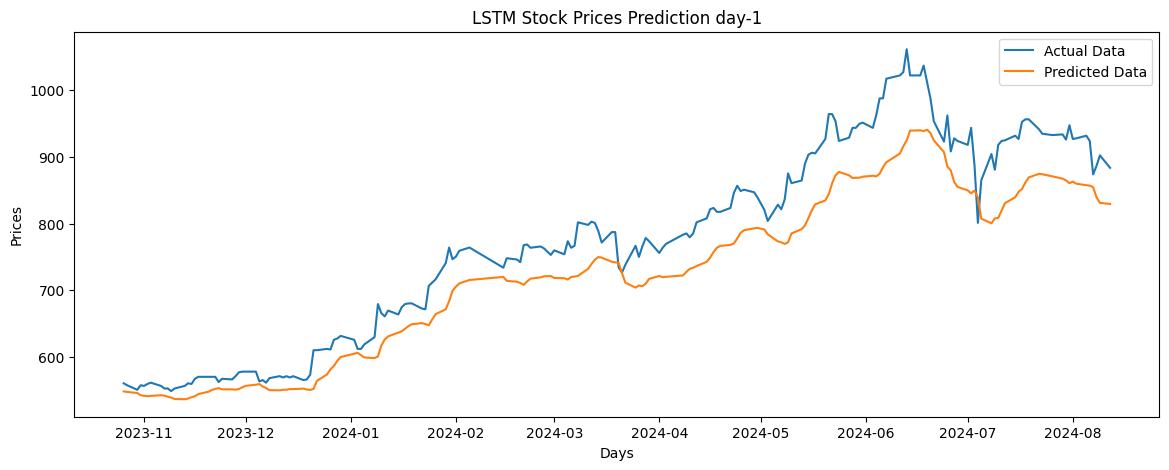

Day 1 MSE: 3408.203589797909



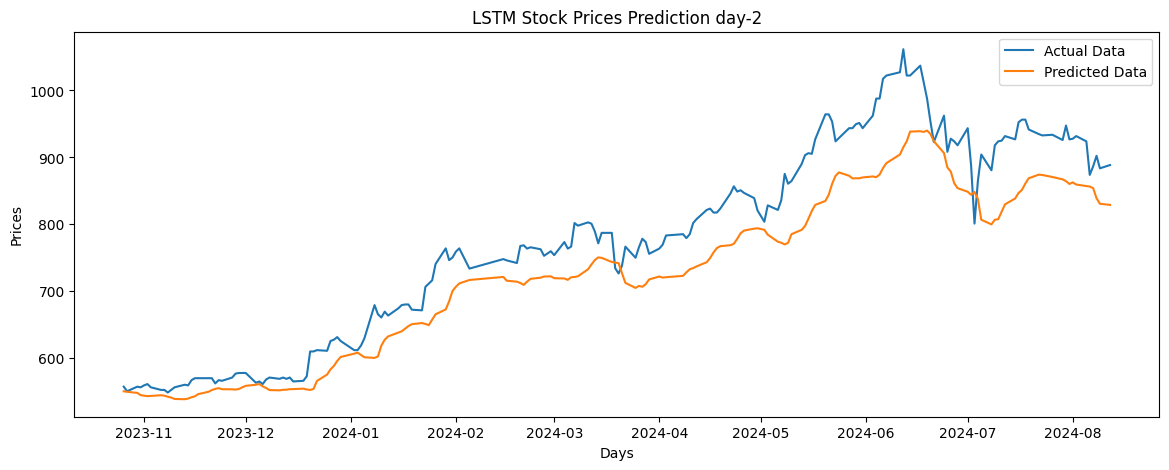

Day 2 MSE: 3706.1394751373246



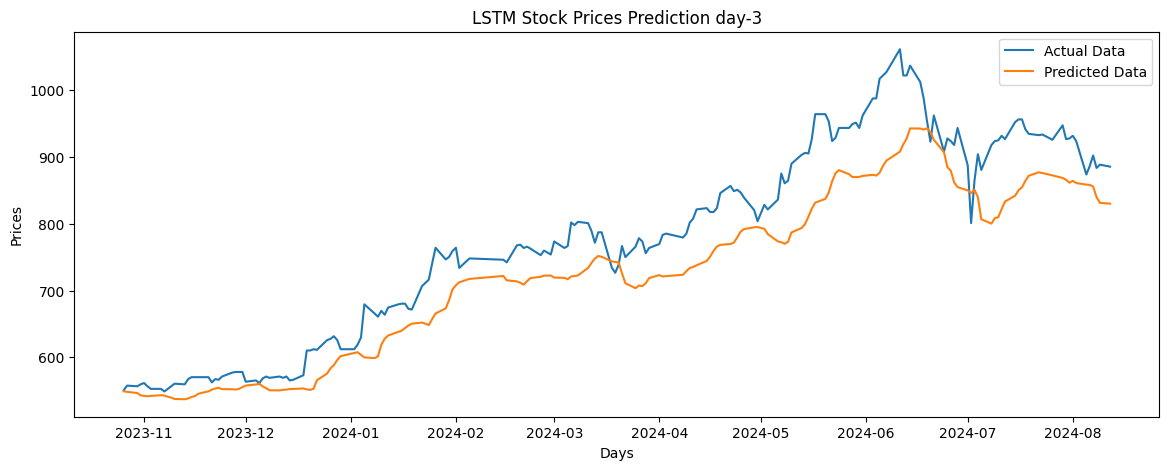

Day 3 MSE: 3916.236001524149



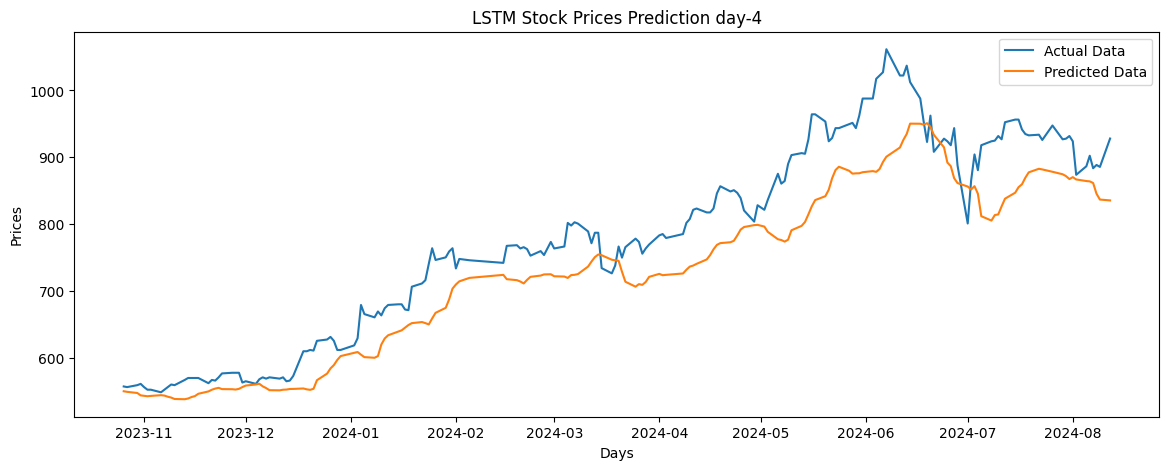

Day 4 MSE: 3905.2877782304527



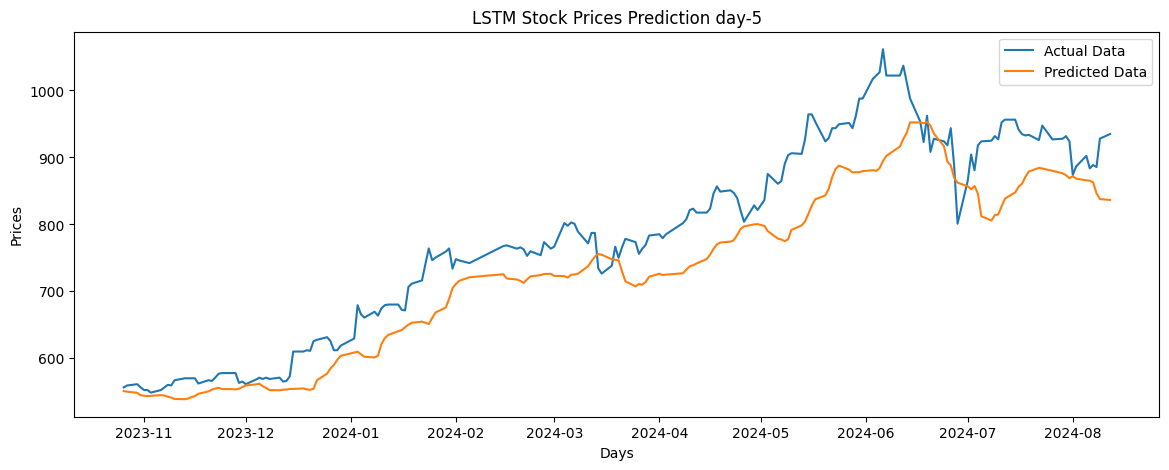

Day 5 MSE: 4186.908608176723



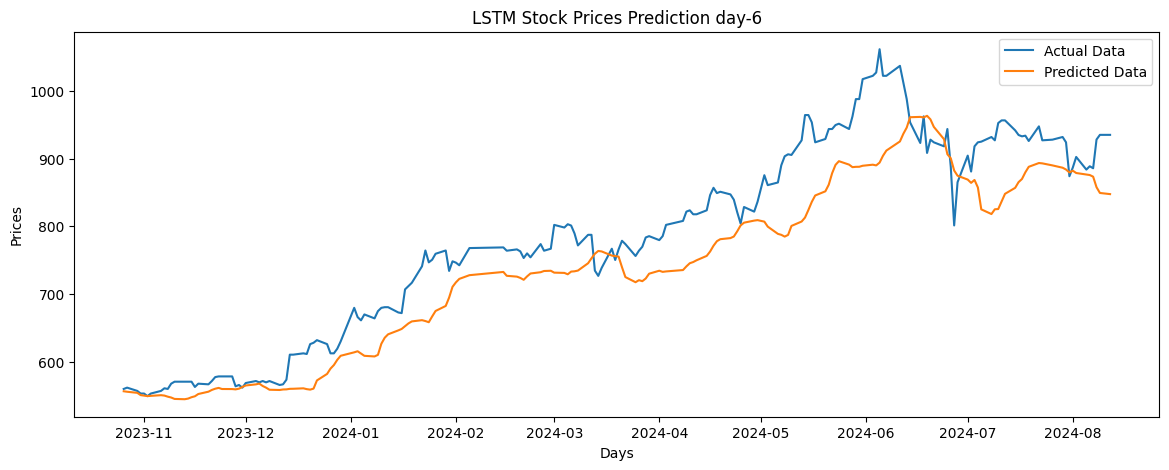

Day 6 MSE: 3756.133491637891



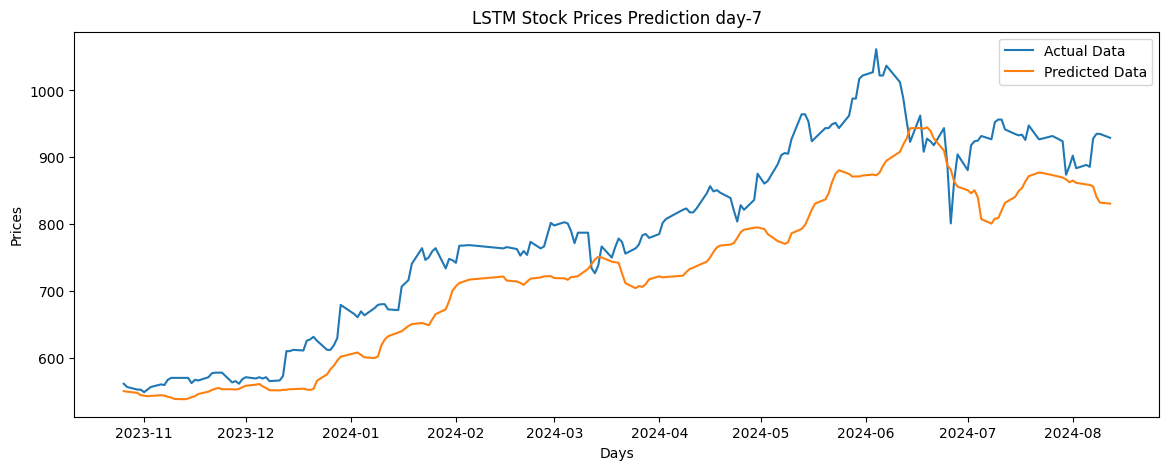

Day 7 MSE: 5471.03158145261



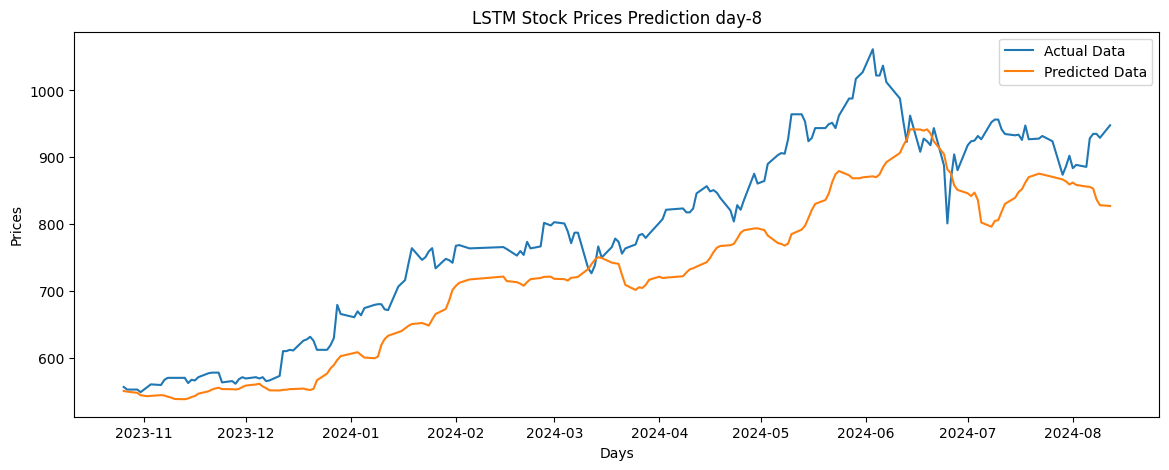

Day 8 MSE: 6025.046937506281



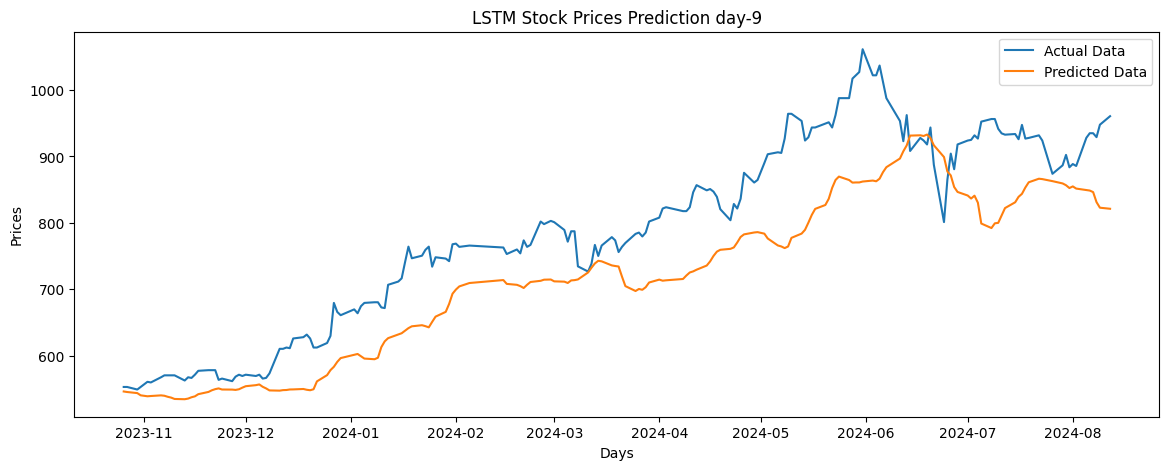

Day 9 MSE: 7385.265001064082



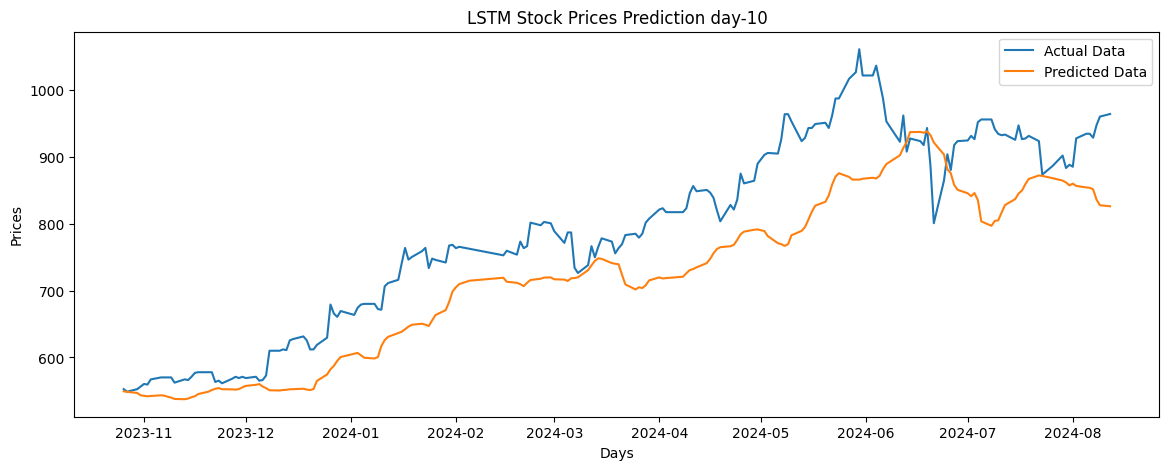

Day 10 MSE: 7084.759453441409



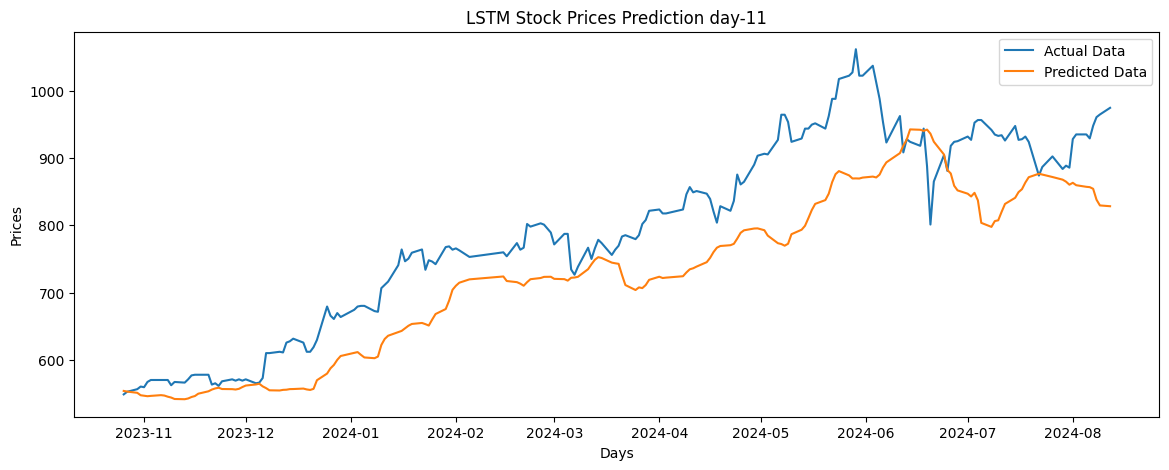

Day 11 MSE: 7019.691169319204



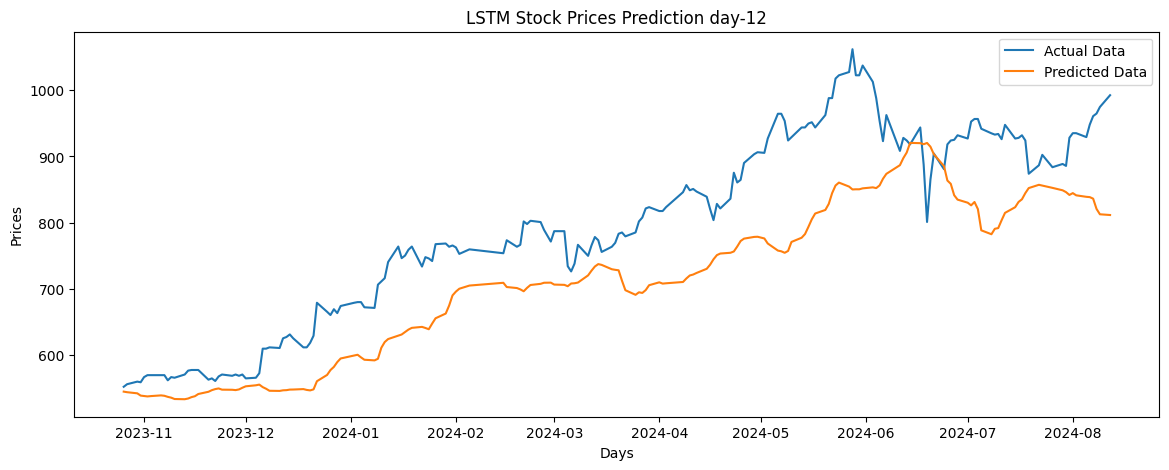

Day 12 MSE: 9677.110878424615



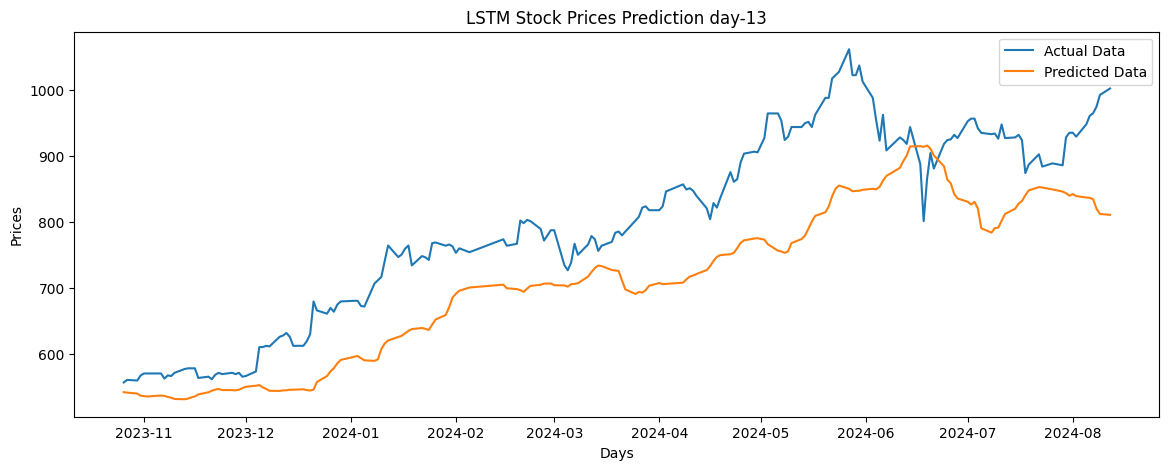

Day 13 MSE: 10706.654214023503



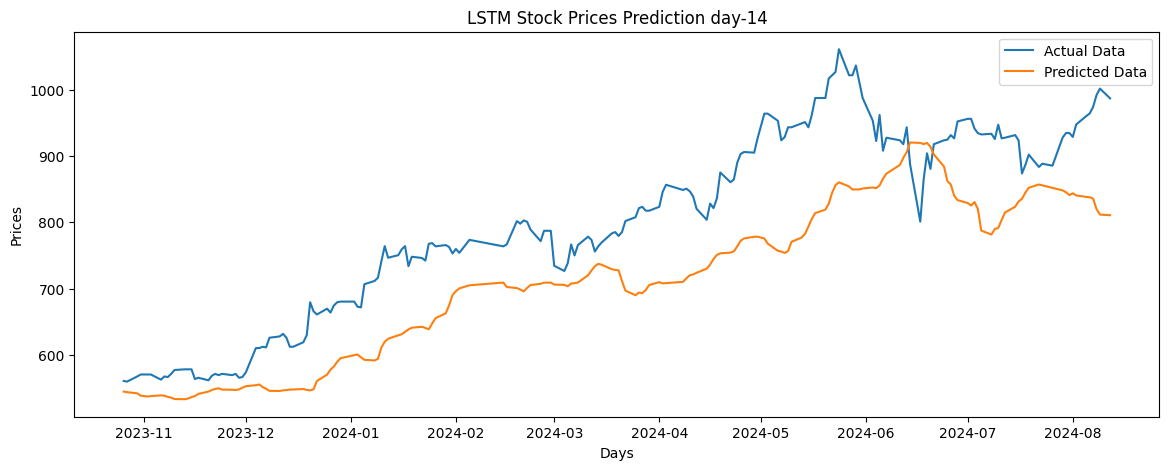

Day 14 MSE: 10754.498345992979



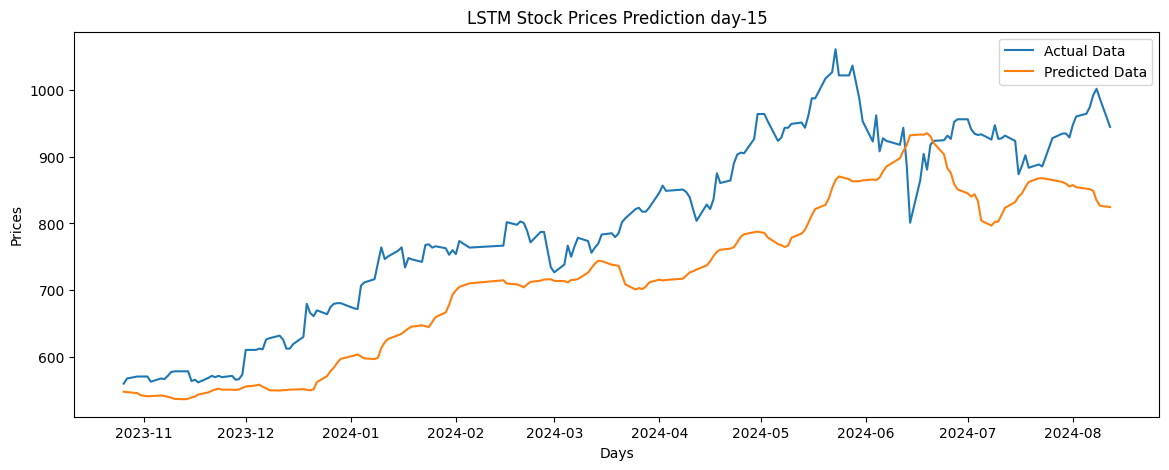

Day 15 MSE: 9749.015513874863



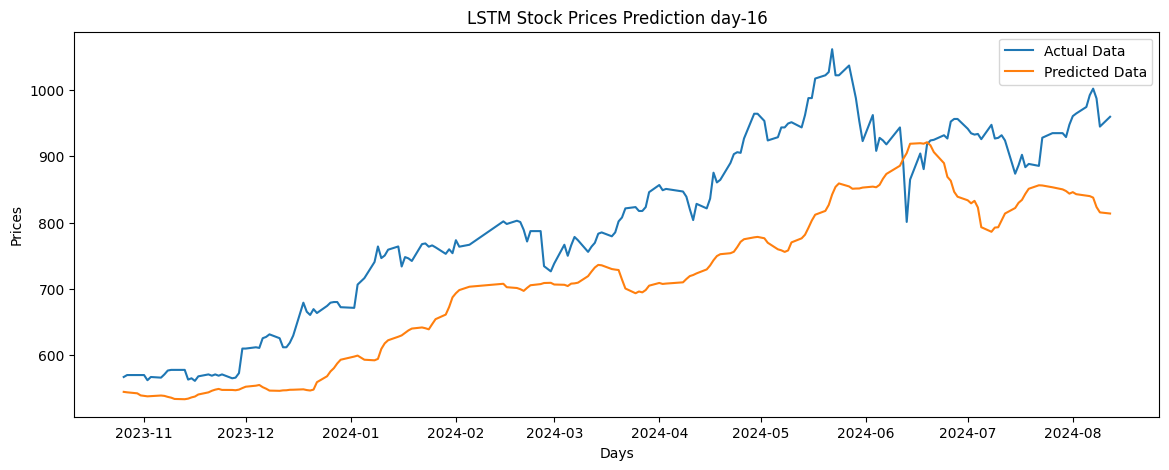

Day 16 MSE: 11460.625928930034



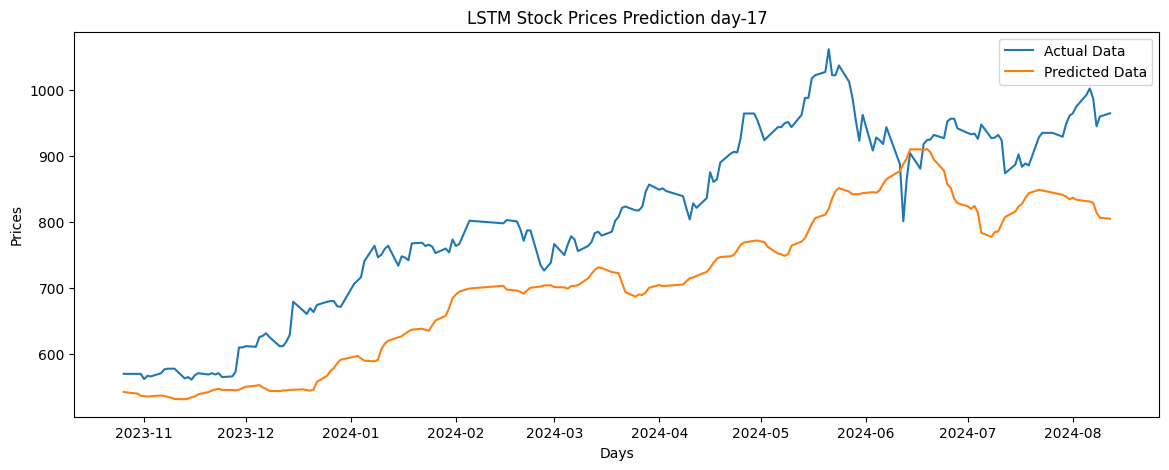

Day 17 MSE: 12961.363628746336



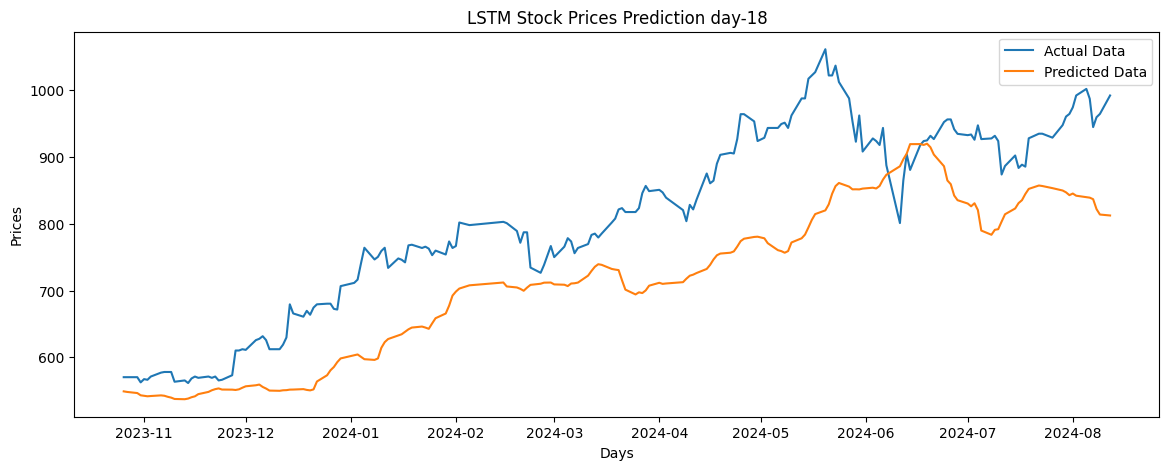

Day 18 MSE: 11972.357278702657



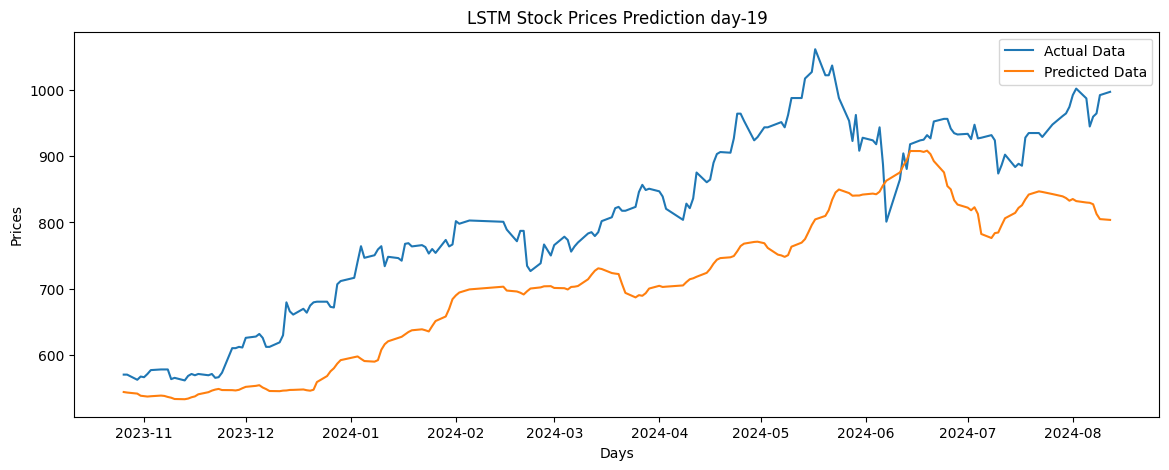

Day 19 MSE: 14078.39519113287



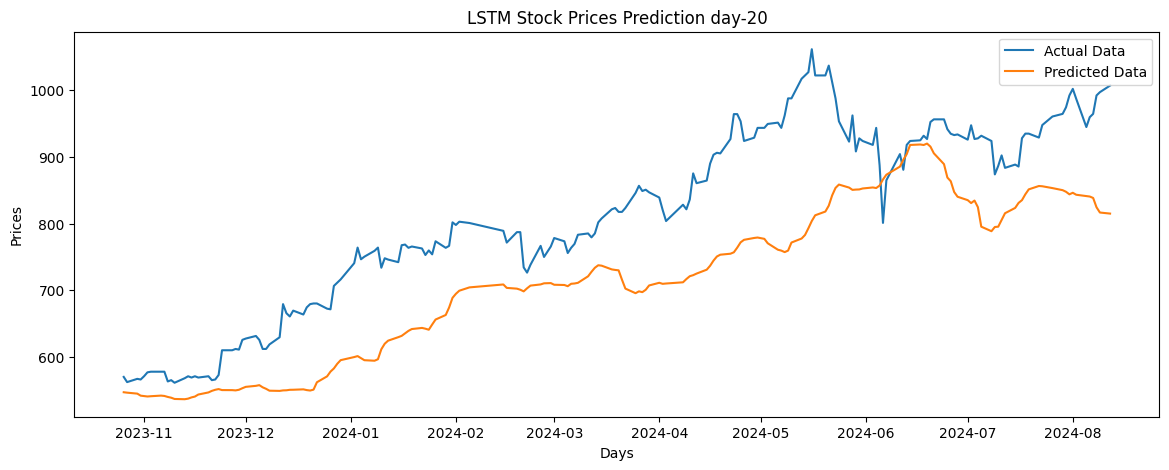

Day 20 MSE: 13104.830568515925



In [ ]:
from sklearn.metrics import mean_squared_error  # 均方誤差

for i in range(n_outputs):
    plt.figure(figsize=(14, 5))
    test_true_df = pd.DataFrame(
        test_true[:, i], columns=['Actual'], index=test_data.index[:len(test_true)])
    test_predict_df = pd.DataFrame(
        y_pred[:, i], columns=['Predicted'], index=test_data.index[:len(y_pred)])
    plt.plot(test_true_df, label='Actual Data')  # 畫出實際數據
    plt.plot(test_predict_df, label='Predicted Data')  # 畫出預測數據
    plt.title(f'LSTM Stock Prices Prediction day-{i + 1}')
    plt.xlabel('Days')
    plt.ylabel('Prices')
    plt.legend()
    plt.show()
    mse = mean_squared_error(test_true[:, i], y_pred[:, i])
    print(f'Day {i + 1} MSE:', mse)
    print()